<a href="https://colab.research.google.com/github/fud200/WASSUP_Project_team7/blob/LJY/Team7_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import warnings

warnings.filterwarnings(action='ignore')

Diagnosis (진단)  
Sex (성별)  
Race (인종)  
Housing (주거 상태)  
Delay (치료 지연)  
Anhedonia (즐거움 상실)  
Dep_Mood (우울한 기분)  
Sleep (수면)  
Tired (피로)  
Appetite (식욕)  
Rumination (고민)  
Concentration (집중력)  
Psychomotor (정신 운동 기능)  
Delusion (환각)  
Suspicious (의심)  
Withdrawal (사회적 은둔)  
Passive (수동적 행동)  
Tension (긴장)  
Unusual_Thought (이상한 생각)  


In [27]:
# 데이터 불러오기
train_data = pd.read_csv('/content/Dianosis_train1.csv')
test_data = pd.read_csv('/content/Dianosis_test.csv')

In [5]:
train_data.describe()

,Diagnosis,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9516.000000,10000.000000,9461.000000,10000.000000,10000.000000,10000.000000,9799.000000
mean,0.503600,6.485137,7.339722,7.019229,5.495094,5.004880,5.684392,6.507784,4.660375,2.639820,2.769270,3.979344,4.875879,4.892598,2.503921,6.248728
std,0.500012,1.111695,1.135760,0.995286,1.121692,0.995302,1.889586,1.110032,1.103300,1.078949,1.084593,1.130747,0.977009,1.695571,0.985240,2.268198
min,0.000000,2.361254,3.007422,3.104940,1.152386,1.629374,0.457384,1.844317,0.848507,1.000022,1.000629,1.015541,1.039531,1.003486,1.000238,0.502300
25%,0.000000,5.723042,6.556735,6.350163,4.738076,4.336195,4.246898,5.752434,3.915314,1.748510,1.917813,3.179104,4.225069,3.528066,1.707915,4.448838
50%,1.000000,6.467649,7.355944,7.021443,5.487237,5.003497,5.340179,6.509457,4.686469,2.477999,2.642702,3.983952,4.906347,5.479616,2.372742,6.330896
75%,1.000000,7.248700,8.139588,7.696230,6.254233,5.686767,7.282476,7.276955,5.426938,3.411670,3.486268,4.779751,5.577368,6.266723,3.164034,8.209953
max,1.000000,9.939766,9.996840,9.982799,9.359651,8.737019,9.999307,9.857221,8.773658,6.971974,6.928617,6.996624,6.999574,6.999820,6.494824,9.999722


In [6]:
train_data.isna().sum()

Diagnosis           0
Sex                 0
Race                0
Housing             0
Delay               0
Anhedonia           0
DepMood             0
Sleep               0
Tired               0
Appetite            0
Rumination          0
Concentration       0
Psychomotor         0
Delusion          484
Suspicious          0
Withdrawal        539
Passive             0
Tension             0
UnusualThought      0
Income            201
dtype: int64

In [28]:
def put_nan(feature_name):
    index=[]
    income_mean=train_data[feature_name].mean()
    num_max=income_mean+0.3
    num_min=income_mean-0.3
    for i in range(len(train_data[feature_name])):
        if num_min<train_data[feature_name][i]<num_max:
            index.append(i)
    random_idx = random.sample(index, int(len(index)/4))
    print(feature_name,'에는 ',len(index),'개의 결측치 후보가 있어서',len(random_idx),'개를 제거합니다.')
    for i in random_idx:
        train_data[feature_name][i]=np.NaN

In [29]:
put_nan('Income')

Income 에는  605 개의 결측치 후보가 있어서 151 개를 제거합니다.


In [30]:
put_nan('Delusion')

Delusion 에는  1453 개의 결측치 후보가 있어서 363 개를 제거합니다.


In [31]:
put_nan('Withdrawal')

Withdrawal 에는  1619 개의 결측치 후보가 있어서 404 개를 제거합니다.


In [32]:
train_data.isna().sum()

Diagnosis           0
Sex                 0
Race                0
Housing             0
Delay               0
Anhedonia           0
DepMood             0
Sleep               0
Tired               0
Appetite            0
Rumination          0
Concentration       0
Psychomotor         0
Delusion          847
Suspicious          0
Withdrawal        943
Passive             0
Tension             0
UnusualThought      0
Income            352
dtype: int64

In [33]:
train_data['Sex'] = train_data['Sex'].map({'Male' : 0, 'Female' : 1})
train_data['Housing'] = train_data['Housing'].map({'Unstable' : 0, 'Stable' : 1})
train_data['Delay'] = train_data['Delay'].map({'No' : 0, 'Yes' : 1})

In [34]:
train_data.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,1,0,Asian,1,0,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,0,0,Hispanic,1,0,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,1,1,Black,0,0,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,0,1,Black,1,1,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903
4,1,0,White,1,1,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,NaN,3.537156,6.034795,3.502844,8.012474


In [18]:
test_data.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought
0,1,Male,White,Stable,Yes,6.532957,6.662940,6.200509,5.082433,5.495875,2.933780,7.142030,4.734500,2.773761,3.559530,5.486171,4.852627,6.603999,1.194969
1,1,Female,Asian,Stable,No,4.696685,8.437778,7.473485,4.711261,4.480269,5.551996,7.102520,3.822138,2.001125,3.027988,1.383793,5.440405,6.080530,2.287655
2,0,Female,Black,Stable,Yes,8.782816,7.908974,7.213374,4.356265,2.850050,7.061972,7.497020,4.967228,1.925978,1.103069,4.424148,5.101434,6.053067,1.163207
3,1,Male,White,Stable,Yes,5.511104,5.899826,7.479371,2.366412,7.130631,3.576740,5.655202,6.674195,4.342724,3.159770,5.193405,5.474838,6.499117,3.798262
4,0,Female,White,Stable,Yes,7.589003,9.643284,7.706466,5.501671,6.083194,9.205154,5.149195,3.996624,1.746914,1.737649,4.737726,4.712968,4.190474,2.840198


In [35]:
test_data['Sex'] = test_data['Sex'].map({'Male' : 0, 'Female' : 1})
test_data['Housing'] = test_data['Housing'].map({'Unstable' : 0, 'Stable' : 1})
test_data['Delay'] = test_data['Delay'].map({'No' : 0, 'Yes' : 1})

In [20]:
test_data.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought
0,1,0,White,1,1,6.532957,6.662940,6.200509,5.082433,5.495875,2.933780,7.142030,4.734500,2.773761,3.559530,5.486171,4.852627,6.603999,1.194969
1,1,1,Asian,1,0,4.696685,8.437778,7.473485,4.711261,4.480269,5.551996,7.102520,3.822138,2.001125,3.027988,1.383793,5.440405,6.080530,2.287655
2,0,1,Black,1,1,8.782816,7.908974,7.213374,4.356265,2.850050,7.061972,7.497020,4.967228,1.925978,1.103069,4.424148,5.101434,6.053067,1.163207
3,1,0,White,1,1,5.511104,5.899826,7.479371,2.366412,7.130631,3.576740,5.655202,6.674195,4.342724,3.159770,5.193405,5.474838,6.499117,3.798262
4,0,1,White,1,1,7.589003,9.643284,7.706466,5.501671,6.083194,9.205154,5.149195,3.996624,1.746914,1.737649,4.737726,4.712968,4.190474,2.840198


**EDA결과 => Race의 Black이 높은 비율로 조현병 진단  
Race => Is_Black 컬럼으로 대체**

In [37]:
train_data['Is_Black'] = train_data['Race']
test_data['Is_Black'] = test_data['Race']

In [38]:
black = ['Black']
non_black = ['Asian', 'Hispanic', 'White']

for each in black:
    train_data['Is_Black'] = train_data['Is_Black'].replace(each, '1')
    test_data['Is_Black'] = test_data['Is_Black'].replace(each, '1')

for each in non_black:
    train_data['Is_Black'] = train_data['Is_Black'].replace(each, '0')
    test_data['Is_Black'] = test_data['Is_Black'].replace(each, '0')

In [39]:
train_data.drop(columns = ['Race'], inplace = True)
test_data.drop(columns = ['Race'], inplace = True)

In [ ]:
train_data.head(20)

In [ ]:
test_data.head()

**정신쪽과 관련있을 것 같은 변수들을 통해 파생변수 만들기**


Delusion => 상관계수가 0.6으로 관계성이 높음  
Rumination => 남성이 여성에 비해 낮고, 대체적으로 낮은 값은 Dianosis 1을 나타냄  
Unusual_Thought => 남성이 여성에 비해 높고, 대체적으로 높은 값은 Dianosis 1을 나타냄  
아래와 같은 공식을 만들어 보았음




In [90]:
train_data['Psych_Stress'] = (train_data['Delusion'] + train_data['UnusualThought'] -  train_data['Rumination'])

In [93]:
train_data['Psych_Stress'] = train_data['Psych_Stress'].round(1)

In [94]:
train_data.head(10)

,Diagnosis,Sex,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,...,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income,Is_Black,Psych_Stress
0,1,0,1,0,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,...,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176,0,-1.3
1,0,0,1,0,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,...,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389,0,-1.0
2,1,1,0,0,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,...,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534,1,2.1
3,0,1,1,1,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,...,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903,1,-2.8
4,1,0,1,1,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,...,4.631259,3.452163,4.862946,NaN,3.537156,6.034795,3.502844,8.012474,0,3.5
5,1,0,1,0,6.792071,7.356555,6.357645,5.632825,5.465320,4.558195,...,5.409327,1.955426,5.325726,3.520632,4.101719,6.984951,2.663967,7.827365,0,0.1
6,1,1,1,1,6.041251,6.184474,6.312660,4.117508,4.662996,4.731070,...,4.701880,2.644587,5.125349,3.480147,4.695503,6.034624,3.291693,9.874306,0,1.2
7,1,0,1,1,5.001452,7.278523,6.151661,6.016339,4.568768,4.988316,...,4.652116,NaN,4.560056,6.015425,3.010023,6.584751,4.304365,6.954237,1,NaN
8,0,1,1,1,7.163288,6.916091,6.758331,7.739223,5.880779,7.337959,...,7.160140,1.136367,2.032391,3.399834,3.678778,3.823287,2.074402,3.736413,0,-4.1
9,0,0,1,0,7.064150,8.652332,7.161443,6.515413,3.234756,5.247541,...,5.175847,1.300076,1.307988,1.420812,4.814137,1.399222,1.587281,4.565128,1,-2.4


In [95]:
train_data['Psych_Stress'].fillna(0)

0      -1.3
1      -1.0
2       2.1
3      -2.8
4       3.5
       ... 
9995   -3.3
9996   -2.0
9997   -4.0
9998    1.2
9999    4.0
Name: Psych_Stress, Length: 10000, dtype: float64

In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       10000 non-null  int64  
 1   Sex             10000 non-null  int64  
 2   Housing         10000 non-null  int64  
 3   Delay           10000 non-null  int64  
 4   Anhedonia       10000 non-null  float64
 5   DepMood         10000 non-null  float64
 6   Sleep           10000 non-null  float64
 7   Tired           10000 non-null  float64
 8   Appetite        10000 non-null  float64
 9   Rumination      10000 non-null  float64
 10  Concentration   10000 non-null  float64
 11  Psychomotor     10000 non-null  float64
 12  Delusion        9153 non-null   float64
 13  Suspicious      10000 non-null  float64
 14  Withdrawal      9057 non-null   float64
 15  Passive         10000 non-null  float64
 16  Tension         10000 non-null  float64
 17  UnusualThought  10000 non-null  

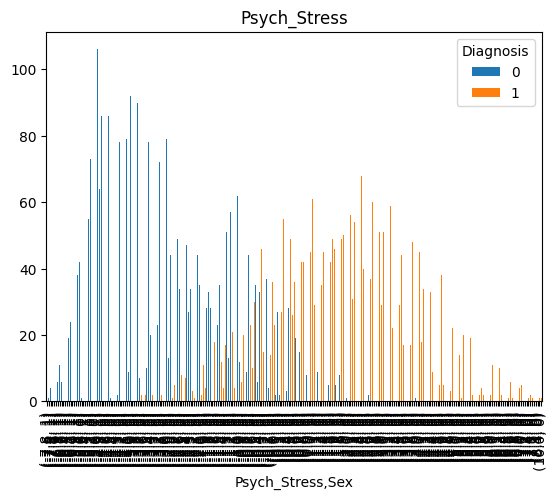

In [97]:
a = train_data.groupby(['Psych_Stress','Diagnosis',  'Sex'])['Diagnosis'].count().unstack('Diagnosis')
a.plot(kind = 'bar')
plt.title('Psych_Stress')
plt.show()

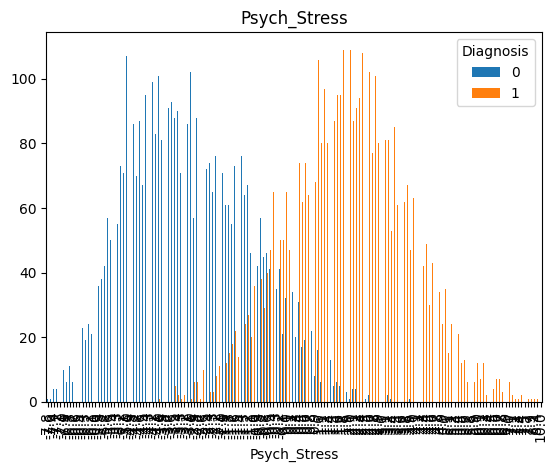

In [98]:
b = train_data.groupby(['Psych_Stress','Diagnosis'])['Diagnosis'].count().unstack('Diagnosis')
b.plot(kind = 'bar')
plt.title('Psych_Stress')
plt.show()

**데이터 분석 결과 여성과 남성에서의 차이도 있다고 느껴 여성과 남성을 분리하여 데이터를 분석해봄**

In [ ]:
a = train_data.groupby(['Psych_Stress','Sex'])['Sex'].count().unstack('Sex')
a.plot(kind = 'bar')
plt.title('Psych_Stress')
plt.show()

In [ ]:
male_diagnosis = train_data[train_data['Sex'] == 1]

In [ ]:
female_diagnosis = train_data[train_data['Sex'] == 0]

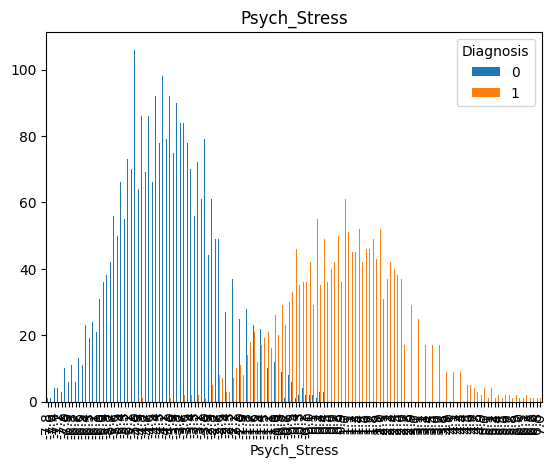

In [112]:
c = male_diagnosis.groupby(['Psych_Stress','Diagnosis'])['Diagnosis'].count().unstack('Diagnosis')
c.plot(kind = 'bar')
plt.title('Psych_Stress')
plt.show()

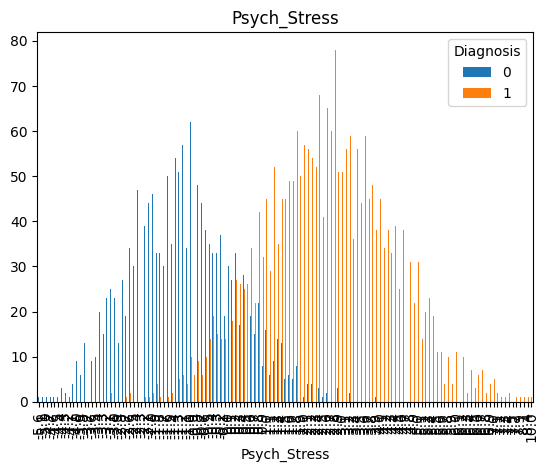

In [114]:
d = female_diagnosis.groupby(['Psych_Stress','Diagnosis'])['Diagnosis'].count().unstack('Diagnosis')
d.plot(kind = 'bar')
plt.title('Psych_Stress')
plt.show()

**비교 결과 예상과 같이 둘다 분리는 잘 되었지만 남성쪽이 더 잘 구분되는 것 같음**